c:\Users\Bryant Xia\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Bryant Xia\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:2860: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


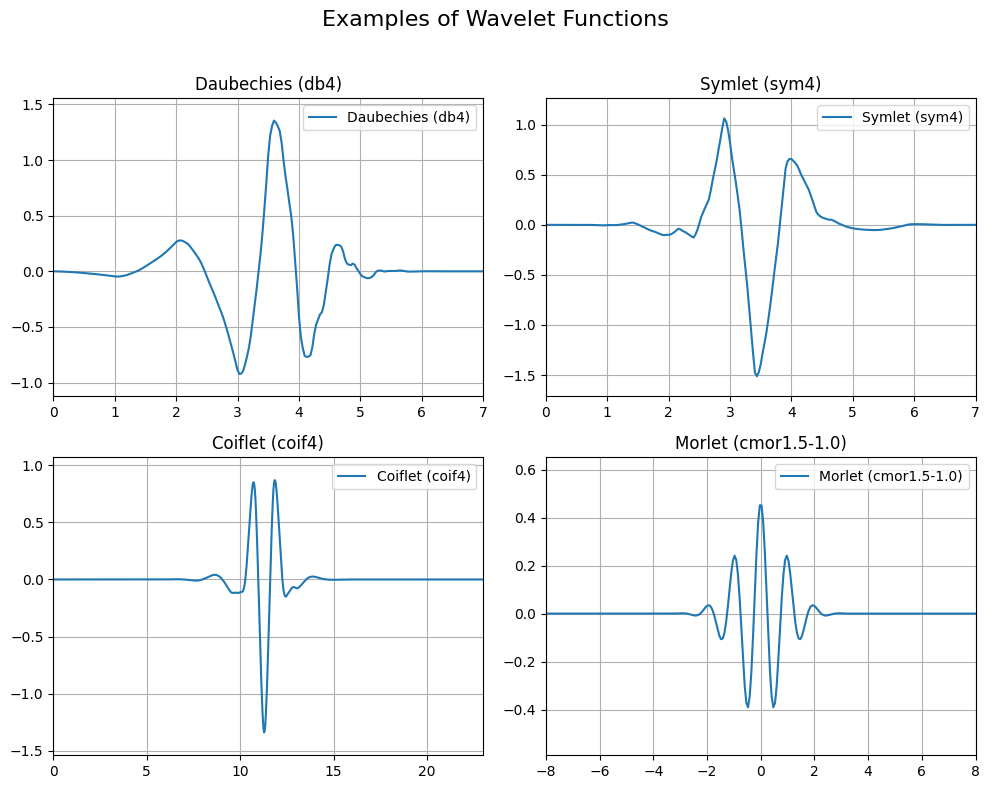

In [11]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

# Define wavelets and their names (excluding Meyer and Biorthogonal)
wavelets = ['db4', 'sym4', 'coif4', 'cmor1.5-1.0']
wavelet_names = ['Daubechies (db4)', 'Symlet (sym4)', 'Coiflet (coif4)', 
                 'Morlet (cmor1.5-1.0)']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Examples of Wavelet Functions', fontsize=16)

for i, (wavelet_name, ax) in enumerate(zip(wavelets, axes.flatten())):
    wavelet = pywt.ContinuousWavelet(wavelet_name) if wavelet_name.startswith('cmor') else pywt.Wavelet(wavelet_name)
    
    if wavelet_name.startswith('cmor'):
        psi, x_ = wavelet.wavefun() 
    else:
        wavefun_output = wavelet.wavefun(level=5)
        if len(wavefun_output) == 2:
            psi, x_ = wavefun_output
        else:
            phi, psi, x_ = wavefun_output[:3]
    
    ax.plot(x_, psi, label=f'{wavelet_names[i]}')
    ax.set_title(f'{wavelet_names[i]}')
    ax.legend(loc="upper right", fontsize=10)
    
    ax.set_xlim(min(x_), max(x_))
    ax.set_ylim(min(psi) - 0.2, max(psi) + 0.2)
    ax.grid()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('bryant_figures/zoo.png', dpi=150)